In [ ]:
!pip install transformers

import numpy as np
import pandas as pd
import nltk,re
import seaborn as sns
import matplotlib.pyplot as plt


# Plotly based imports for visualization
from plotly import tools
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score

import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense,Dropout
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from tqdm import tqdm
from transformers import BertTokenizer,BertModel




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

import json
from google.colab import drive
drive.mount('/drive')

infile = open('/drive/MyDrive/Colab Notebooks/Final_Project_NLP/train_proj.csv)



In [ ]:
#load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Project_NLP/train_proj.csv').iloc[:,1:]


In [ ]:
df.head()

,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0


In [ ]:
df.shape

(1306122, 2)

In [ ]:
df['target'].value_counts()  #count distibution

0    1225312
1      80810
Name: target, dtype: int64

In [ ]:
df.isnull().sum() #check for Null values

question_text    0
target           0
dtype: int64

In [ ]:
df_sin = df[df['target']==0]
df_ins = df[df['target']==1]

In [ ]:
df['token_cnt'] = df['question_text'].str.lower().str.count(' ')+1    #get the token count
df['char_len'] = df['question_text'].str.lower().apply(len)           #get charecter count

df['n_special_char'] = df['question_text'].str.findall('[^a-zA-Z0-9 ]').str.len()     #get special charcter count
df['n_digit'] = df['question_text'].str.findall(r'\d').str.len()                      #get digits counts
df['n_unique_tokens'] = df['question_text'].apply(lambda x: len(set(x.split(' '))))    #number of unique tokens

In [ ]:
print(f"longest token length is {df['token_cnt'].max()}")
print(f"longest characters length is {df['char_len'].max()}")
print()
print(f"longest token length is in {df['token_cnt'].argmax()}")
print(f"longest characters length is in  {df['char_len'].argmax()}")


longest token length is 122
longest characters length is 1017

longest token length is in 522266
longest characters length is in  443216


In [ ]:
df['question_text'][522266],df['target'][522266]

('In "Star Trek 2013" why did they :\n\n*Spoilers*\n*Spoilers*\n*Spoilers*\n*Spoilers*\n\n1)Make warping look quite a bit like an hyperspace jump\n2)what in the world were those bright particles as soon as they jumped.\n3)Why in the world did they make it possible for two entities to react in warp space in separate jumps.\n4)Why did Spock get emotions for this movie.\n5)What was the point of hiding the "Enterprise" underwater.\n6)When they were intercepted by the dark ship, how come they reached Earth when they were far away from her.(I don\'t seem to remember the scene where they warp to earth).\n7)How did the ship enter earth\'s atmosphere when it wasnt even in orbit.\n8)When Scotty opened the door of the black ship , how come pike and khan didn\'t slow down?',
 0)

In [ ]:
df['question_text'][443216],df['target'][443216]

("What is [math]\\frac{\\int_{1x^5}^{3x^{-5}} \\tan(\\tan({\\boxed{\\int_{1x^0}^{1x^2} \\sum_{\\varpi=1}^{\\infty} \\int_{2x^{-3}}^{2x^2} \\sum_{\\alpha=7}^{\\infty} \\underbrace{\\sqrt[2]{1x^5}}_{\\text{Gauss's Law of Theoretical Probability.}} d\\tau dx}}^{1x^0})) d\\mu}{\\int_{2x^{-3}}^{1x^5} \\cos(\\int_{2x^2}^{1x^{-3}} \\frac{\\sqrt[2]{\\overbrace{\\underbrace{\\frac{3x^3+3x^5}{\\sqrt[3]{2x^{-3}}}}_{\\text{Gauss's Law of Theoretical Probability.}} \\times \\overbrace{\\tan(2x^0)}^{\\text{Gauss's Law of Theoretical Probability.}}-\\sum_{4=7}^{\\infty} \\boxed{3x^{-5}}}^{\\text{Inverse Function.}}}}{{\\boxed{\\int_{2x^2}^{2x^4} 3x^1 d9} \\div \\sum_{6=6}^{\\infty} \\sqrt[3]{2x^2}+\\sqrt[4]{\\sin(2x^0+3x^0)}}^{2x^{-4}}+\\boxed{\\frac{\\vec{\\boxed{\\sum_{\\gamma=10}^{\\infty} 1x^{-5}}}}{\\frac{\\sum_{\\iota=2}^{\\infty} 1x^{-5}-\\frac{3x^{-1}}{1x^{-4}}}{\\sin(\\tan(3x^{-2}))}}}} \\times \\boxed{\\sqrt[2]{{{{\\sqrt[5]{2x^5}}^{2x^{-1}}}^{2x^{-1}} \\div \\sum_{\\chi=6}^{\\infty} \\int_{

In [ ]:
sin = df[df['target']==0]['token_cnt']
ins = df[df['target']==1]['token_cnt']

In [ ]:
df.head()

,question_text,target,token_cnt,char_len,n_unique_tokens,n_special_char,n_digit
0,How did Quebec nationalists see their province...,0,13,72,13,1,4
1,"Do you have an adopted dog, how would you enco...",0,16,81,15,2,0
2,Why does velocity affect time? Does velocity a...,0,10,67,8,2,0
3,How did Otto von Guericke used the Magdeburg h...,0,9,57,9,1,0
4,Can I convert montra helicon D to a mountain b...,0,15,77,15,1,0


###EDA

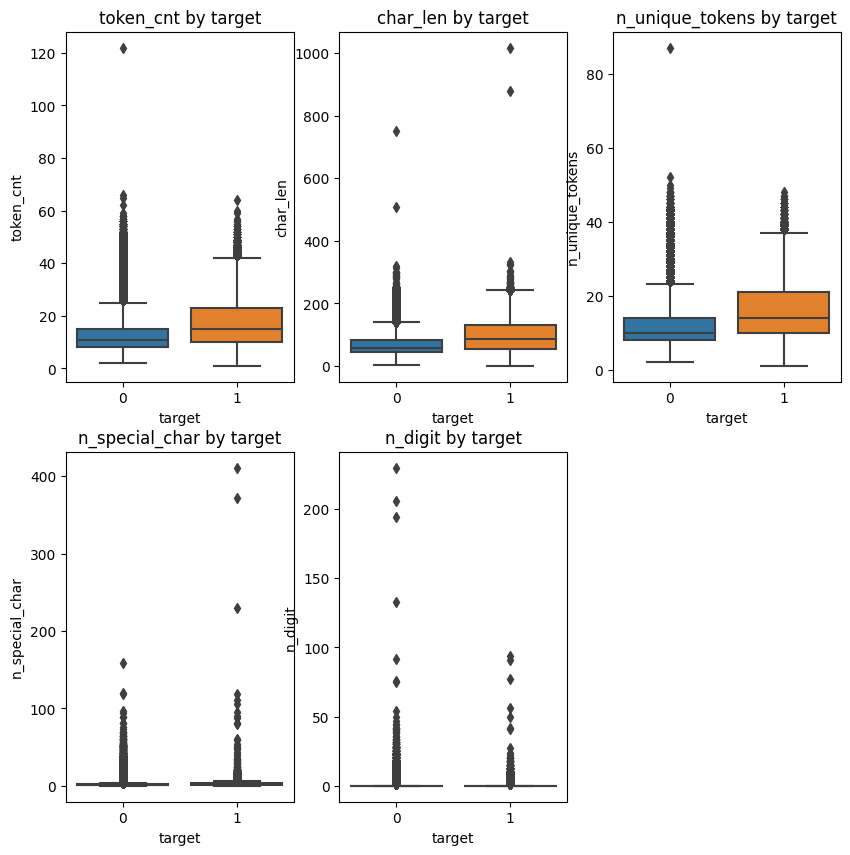

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
num_cols = ['token_cnt', 'char_len', 'n_unique_tokens', 'n_special_char', 'n_digit']

for col, axes in enumerate(ax.ravel()):
    if col < len(num_cols):
        sns.boxplot(x='target', y=num_cols[col], data=df, ax=axes)
        axes.set_title(f'{num_cols[col]} by target')
    else:
        axes.axis('off')


<li>Insincere questions has token_cnt and char len more than Sincere question

<li>Simillarly, number of unique tokens are more in insincere tokens

In [ ]:
%matplotlib inline
#
sin = df[df['target']==0]['token_cnt']
ins = df[df['target']==1]['token_cnt']

trace1 = go.Histogram(
        x=sin, name='Sincere',
        opacity=0.75
    )
trace2 = go.Histogram(
        x=ins, name = 'Not_Sincere',
        opacity=0.75
    )

data = [trace1, trace2]
layout = go.Layout(
    title='Token Distribution in Sincere and InSincere Data',
    xaxis=dict(title='Token Count'),
    yaxis=dict(title='Frequency')
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")


In [ ]:
%matplotlib inline
#
sin = df[df['target']==0]['char_len']
ins = df[df['target']==1]['char_len']

trace1 = go.Histogram(
        x=sin, name='Sincere',
        opacity=0.75
    )
trace2 = go.Histogram(
        x=ins, name = 'Not_Sincere',
        opacity=0.75
    )

data = [trace1, trace2]
layout = go.Layout( title='Char Ditribution in Sincere and InSincere data')
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")


In [ ]:
labels = ['Sincere','InSincere']
values = df['target'].value_counts().values
colors = ['lightgreen','red']

fig = go.Figure([go.Pie(labels = labels,values = values,title='Target Value Distribution')])
fig.update_traces(hoverinfo = "label+percent",marker=dict(colors=colors,line=dict(color='#000000', width=2)))
fig.show(renderer="colab")


In [ ]:
sin_corpus = ' '.join(df_sin['question_text'].str.lower())
ins_corpus = ' '.join(df_ins['question_text'].str.lower())


#Unigram Analysis

In [ ]:
token_sin = nltk.word_tokenize(sin_corpus)
token_ins = nltk.word_tokenize(ins_corpus)

In [ ]:
#

unigram_sin = nltk.FreqDist(token_sin).most_common(15)
unigram_ins = nltk.FreqDist(token_ins).most_common(15)
key_sin =  [k for k,v in unigram_sin]
val_sin =  [v for k,v in unigram_sin]

key_ins =  [k for k,v in unigram_ins]
val_ins =  [v for k,v in unigram_ins]



# Create a figure with one row and two columns of subplots, each with a title
fig = make_subplots(rows=1, cols=2, subplot_titles=['Top 15 Sincere Words', 'Top 15 Insincere Words'])

# Add the bar chart for the sincere words to the first subplot
fig.add_trace(
    go.Bar(x=key_sin, y=val_sin),
    row=1, col=1
)

# Add the bar chart for the insincere words to the second subplot
fig.add_trace(
    go.Bar(x=key_ins, y=val_ins),
    row=1, col=2
)

# Set the title of the figure
fig.update_layout(title="Unigram Comparison")

# Show the figure using the default renderer
fig.show(renderer="colab")

###Bi-gram Analysis

In [ ]:
def uni_bi_analysis(tokens_sin,token_ins,unigram=True,top=10):

  if unigram:
    print('calculating Unigrams')
    gram_sin = nltk.FreqDist(token_sin).most_common(top)
    gram_ins = nltk.FreqDist(token_sin).most_common(top)

    keyb_sin =  [k for k,v in gram_sin]
    valb_sin =  [v for k,v in gram_sin]

    keyb_ins =  [k for k,v in gram_ins]
    valb_ins =  [v for k,v in gram_ins]
  else:
    print('calculating Bi-grams')
    gram_sin = nltk.FreqDist(list(nltk.bigrams(token_sin))).most_common(top)
    gram_ins = nltk.FreqDist(list(nltk.bigrams(token_sin))).most_common(top)

    keyb_sin =  [k for k,v in gram_sin]
    valb_sin =  [v for k,v in gram_sin]

    keyb_ins =  [k for k,v in gram_ins]
    valb_ins =  [v for k,v in gram_ins]


    fig = make_subplots(rows=1, cols=2, subplot_titles=['Top 15 Sincere Bi-Gram', 'Top 15 Insincere Bi-Gram'])

    # Add the bar chart for the sincere words to the first subplot
    fig.add_trace(
        go.Bar(x=np.array([f"{bg[0]} {bg[1]}" for bg in keyb_sin]), y=valb_sin),
        row=1, col=1
    )

    # Add the bar chart for the insincere words to the second subplot
    fig.add_trace(
        go.Bar(x=np.array([f"{bg[0]} {bg[1]}" for bg in keyb_ins]), y=valb_ins),
        row=1, col=2
    )

    # Set the title of the figure
    fig.update_layout(title="Bigram Comparison")

    # Show the figure using the default renderer
    fig.show(renderer="colab")

# # Compute the frequency distribution of bigrams in the tokenized sincere and insincere text data
# bigram_sin = nltk.FreqDist(list(nltk.bigrams(token_sin))).most_common(10)
# bigram_ins = nltk.FreqDist(list(nltk.bigrams(token_ins))).most_common(10)

# # Extract the keys (bigram tuples) and values (frequencies) from the frequency distributions
# keyb_sin = [k1,k2 for (k1,k2), v in bigram_sin]
# valb_sin = [v for k, v in bigram_sin]
# keyb_ins = [k for k, v in bigram_ins]
# valb_ins = [v for k, v in bigram_ins]


#Cleaning

In [ ]:
def special_char(sentences):
  symbols = []
  for sentence in sentences:
    sym = re.findall(r'\W+', str(sentence))
    symbols.extend(sym)

  return set(symbols)


In [ ]:
symbols = special_char(df['question_text'].values)
print(symbols)

{')] / [', '()?', '^{.', '$} \\\\ ', ' ‛‛ ', ' (( ', ')[', ' + [\\', '%.?', ')) ÷', '*…', '}, ', '*\n\n', '\\}, ', '} {', ' ™) ', " '+' ", ' ) ) ( ', '})[/', ')<|', ' ({}) ', ' |?', ') ', '₹-', '?”?', ']? ?', '-” ', '||, ', ' \u200e', ' (™) ', '"). ', '/√|', ' ," ', '" (?) ', '++, ', "')", ' ""', '»', '~?', ' " [', ']? [ ', " ' … ", ' "|" ', '= {[', ' << & >>?', '/√ [', '},\\', '= (', ' =?', ': [\\', '°=', ' €', '้" ', '+[', '+(-', ':] ', '}({', ' 〖', ')? . ', ' (#) ', ': "/', '́', '": "', ') %', '.\n', '° . ', "?' (", ' ++= ', '}} , ', '\\ \\', ') =', '}) ', "'= ", ' :-( ', ' (//', ')}+', ' "¿?" ', '>?"', '). ( ', '. "…") ', '.) & ', '; %', '* | ', '\'", ', ':= {', '/?', '" & "', '? ¡', '}-(', '↓', "''-", '/"), ', ' \\| [/', '.” ?', ' "`" ', '= {', ')! } {(', '". "', ') /(', '़', '*', '.” ', ') {', '/)', '", &', ', ~', ' “?', "^{''} = ", " ,''", '] **', '"); ', ' $ \\', 'ั่', ' > (', ' ---------------------------?', "' '", '+ + ', ' ∈ [−', ']) ', ') (', ' "."?', "-'", '}^{', "' “", '…

In [ ]:
#cleanig emojis
#removing punctuations
#removing maths equations. [math] maths equation [\math]
#subbing contractions

In [ ]:
punctuations = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\',
        '•', '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`', '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′',
        '█', '…', '“', '★', '”', '–', '●', '►', '−', '¢', '¬', '░', '¡', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓',
        '—', '‹', '─', '▒', '：', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', '¯', '♦', '¤', '▲', '¸', '⋅', '‘', '∞',
        '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '・', '╦', '╣', '╔', '╗', '▬', '❤', '≤', '‡', '√', '◄', '━',
        '⇒', '▶', '≥', '╝', '♡', '◊', '。', '✈', '≡', '☺', '✔', '↵', '≈', '✓', '♣', '☎', '℃', '◦', '└', '‟', '～', '！', '○',
        '◆', '№', '♠', '▌', '✿', '▸', '⁄', '□', '❖', '✦', '．', '÷', '｜', '┃', '／', '￥', '╠', '↩', '✭', '▐', '☼', '☻', '┐',
        '├', '«', '∼', '┌', '℉', '☮', '฿', '≦', '♬', '✧', '〉', '－', '⌂', '✖', '･', '◕', '※', '‖', '◀', '‰', '\x97', '↺',
        '∆', '┘', '┬', '╬', '،', '⌘', '⊂', '＞', '〈', '⎙', '？', '☠', '⇐', '▫', '∗', '∈', '≠', '♀', '♔', '˚', '℗', '┗', '＊',
        '┼', '❀', '＆', '∩', '♂', '‿', '∑', '‣', '➜', '┛', '⇓', '☯', '⊖', '☀', '┳', '；', '∇', '⇑', '✰', '◇', '♯', '☞', '´',
        '↔', '┏', '｡', '◘', '∂', '✌', '♭', '┣', '┴', '┓', '✨', '\xa0', '˜', '❥', '┫', '℠', '✒', '［', '∫', '\x93', '≧', '］',
        '\x94', '∀', '♛', '\x96', '∨', '◎', '↻', '⇩', '＜', '≫', '✩', '✪', '♕', '؟', '₤', '☛', '╮', '␊', '＋', '┈', '％',
        '╋', '▽', '⇨', '┻', '⊗', '￡', '।', '▂', '✯', '▇', '＿', '➤', '✞', '＝', '▷', '△', '◙', '▅', '✝', '∧', '␉', '☭',
        '┊', '╯', '☾', '➔', '∴', '\x92', '▃', '↳', '＾', '׳', '➢', '╭', '➡', '＠', '⊙', '☢', '˝', '∏', '„', '∥', '❝', '☐',
        '▆', '╱', '⋙', '๏', '☁', '⇔', '▔', '\x91', '➚', '◡', '╰', '\x85', '♢', '˙', '۞', '✘', '✮', '☑', '⋆', 'ⓘ', '❒',
        '☣', '✉', '⌊', '➠', '∣', '❑', '◢', 'ⓒ', '\x80', '〒', '∕', '▮', '⦿', '✫', '✚', '⋯', '♩', '☂', '❞', '‗', '܂', '☜',
        '‾', '✜', '╲', '∘', '⟩', '＼', '⟨', '·', '✗', '♚', '∅', 'ⓔ', '◣', '͡', '‛', '❦', '◠', '✄', '❄', '∃', '␣', '≪', '｢',
        '≅', '◯', '☽', '∎', '｣', '❧', '̅', 'ⓐ', '↘', '⚓', '▣', '˘', '∪', '⇢', '✍', '⊥', '＃', '⎯', '↠', '۩', '☰', '◥',
        '⊆', '✽', '⚡', '↪', '❁', '☹', '◼', '☃', '◤', '❏', 'ⓢ', '⊱', '➝', '̣', '✡', '∠', '｀', '▴', '┤', '∝', '♏', 'ⓐ',
        '✎', ';', '␤', '＇', '❣', '✂', '✤', 'ⓞ', '☪', '✴', '⌒', '˛', '♒', '＄', '✶', '▻', 'ⓔ', '◌', '◈', '❚', '❂', '￦',
        '◉', '╜', '̃', '✱', '╖', '❉', 'ⓡ', '↗', 'ⓣ', '♻', '➽', '׀', '✲', '✬', '☉', '▉', '≒', '☥', '⌐', '♨', '✕', 'ⓝ',
        '⊰', '❘', '＂', '⇧', '̵', '➪', '▁', '▏', '⊃', 'ⓛ', '‚', '♰', '́', '✏', '⏑', '̶', 'ⓢ', '⩾', '￠', '❍', '≃', '⋰', '♋',
        '､', '̂', '❋', '✳', 'ⓤ', '╤', '▕', '⌣', '✸', '℮', '⁺', '▨', '╨', 'ⓥ', '♈', '❃', '☝', '✻', '⊇', '≻', '♘', '♞',
        '◂', '✟', '⌠', '✠', '☚', '✥', '❊', 'ⓒ', '⌈', '❅', 'ⓡ', '♧', 'ⓞ', '▭', '❱', 'ⓣ', '∟', '☕', '♺', '∵', '⍝', 'ⓑ',
        '✵', '✣', '٭', '♆', 'ⓘ', '∶', '⚜', '◞', '்', '✹', '➥', '↕', '̳', '∷', '✋', '➧', '∋', '̿', 'ͧ', '┅', '⥤', '⬆', '⋱',
        '☄', '↖', '⋮', '۔', '♌', 'ⓛ', '╕', '♓', '❯', '♍', '▋', '✺', '⭐', '✾', '♊', '➣', '▿', 'ⓑ', '♉', '⏠', '◾', '▹',
        '⩽', '↦', '╥', '⍵', '⌋', '։', '➨', '∮', '⇥', 'ⓗ', 'ⓓ', '⁻', '⎝', '⌥', '⌉', '◔', '◑', '✼', '♎', '♐', '╪', '⊚',
        '☒', '⇤', 'ⓜ', '⎠', '◐', '⚠', '╞', '◗', '⎕', 'ⓨ', '☟', 'ⓟ', '♟', '❈', '↬', 'ⓓ', '◻', '♮', '❙', '♤', '∉', '؛',
        '⁂', 'ⓝ', '־', '♑', '╫', '╓', '╳', '⬅', '☔', '☸', '┄', '╧', '׃', '⎢', '❆', '⋄', '⚫', '̏', '☏', '➞', '͂', '␙',
        'ⓤ', '◟', '̊', '⚐', '✙', '↙', '̾', '℘', '✷', '⍺', '❌', '⊢', '▵', '✅', 'ⓖ', '☨', '▰', '╡', 'ⓜ', '☤', '∽', '╘',
        '˹', '↨', '♙', '⬇', '♱', '⌡', '⠀', '╛', '❕', '┉', 'ⓟ', '̀', '♖', 'ⓚ', '┆', '⎜', '◜', '⚾', '⤴', '✇', '╟', '⎛',
        '☩', '➲', '➟', 'ⓥ', 'ⓗ', '⏝', '◃', '╢', '↯', '✆', '˃', '⍴', '❇', '⚽', '╒', '̸', '♜', '☓', '➳', '⇄', '☬', '⚑',
        '✐', '⌃', '◅', '▢', '❐', '∊', '☈', '॥', '⎮', '▩', 'ு', '⊹', '‵', '␔', '☊', '➸', '̌', '☿', '⇉', '⊳', '╙', 'ⓦ',
        '⇣', '｛', '̄', '↝', '⎟', '▍', '❗', '״', '΄', '▞', '◁', '⛄', '⇝', '⎪', '♁', '⇠', '☇', '✊', 'ி', '｝', '⭕', '➘',
        '⁀', '☙', '❛', '❓', '⟲', '⇀', '≲', 'ⓕ', '⎥', '\u06dd', 'ͤ', '₋', '̱', '̎', '♝', '≳', '▙', '➭', '܀', 'ⓖ', '⇛', '▊',
        '⇗', '̷', '⇱', '℅', 'ⓧ', '⚛', '̐', '̕', '⇌', '␀', '≌', 'ⓦ', '⊤', '̓', '☦', 'ⓕ', '▜', '➙', 'ⓨ', '⌨', '◮', '☷',
        '◍', 'ⓚ', '≔', '⏩', '⍳', '℞', '┋', '˻', '▚', '≺', 'ْ', '▟', '➻', '̪', '⏪', '̉', '⎞', '┇', '⍟', '⇪', '▎', '⇦', '␝',
        '⤷', '≖', '⟶', '♗', '̴', '♄', 'ͨ', '̈', '❜', '̡', '▛', '✁', '➩', 'ா', '˂', '↥', '⏎', '⎷', '̲', '➖', '↲', '⩵', '̗', '❢',
        '≎', '⚔', '⇇', '̑', '⊿', '̖', '☍', '➹', '⥊', '⁁', '✢']

contractions_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not",
                       "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did",
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                       "mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                       "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have",
                       "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
                       "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have",
                       "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                       "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are", "y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }




In [ ]:
def remove_maths_links(text):
  '''
  removed content present between [math]...[/math]
  '''
  if '[math]' in text:
    text = re.sub('\[math\].*?\[\/math\]','maths equation',text)
  if 'http' in text or 'www' in text:
    text = re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', 'URL', text)
  return text


def clean_punct(text):

  #removes all punctuations


  text = "".join([char for char in text if char not in punctuations])
  return text


def remove_stopwords(text):

  #removes stopwords

  text = [tok for tok in text.split() if tok not in set(stopwords.words('english'))]
  text = ' '.join(text)
  return text


def clean_contractions(text):

  #replace contractions

  for word in text.split():
    if word.lower() in contractions_dict:
      text = text.replace(word, contractions_dict[word.lower()])
  return text


lemmatizer = WordNetLemmatizer()
def lemmatize(text):

  #Lemmatize words

  return ' '.join([lemmatizer.lemmatize(word.lower()) for word in text.split()])


In [ ]:
clean_punct('✌')

''

In [ ]:
#removing stopwrds may change the meaning of sentence for example below sentence went from negative to postive.

def clean_text(text):

  text = remove_maths_links(text)
  #print(f"After removing Maths notations {text}")
  #print()
  text = clean_contractions(text)
  #print(f"After removing contractions  {text}")

  text = clean_punct(text)
  #print(f"After removing punctuations  {text}")
  #print()
  text = remove_stopwords(text)
  #print(f"After removing stowprds  {text}")
  #print()

  #print()
  text = lemmatize(text)
  #print(f"After lemmatizing  {text}")
  #print()
  return text



clean_text("This is why i don't want icecream peace ✌. [math]a**2 = 4*4 [/math]")

'this want icecream peace math equation'

After removing Maths notations This is why i don't want icecream peace ✌. maths equation

After removing contractions  This is why i do not want icecream peace ✌. maths equation
After removing punctuations  This is why i do not want icecream peace  maths equation

After removing stowprds  This want icecream peace maths equation


After lemmatizing  this want icecream peace math equation

In [ ]:
df['clean_text'] = df['question_text'].apply(clean_text)

In [ ]:
df.to_csv('cleaned_test.csv',index = None)   #contains clean data

In [ ]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'original Text')

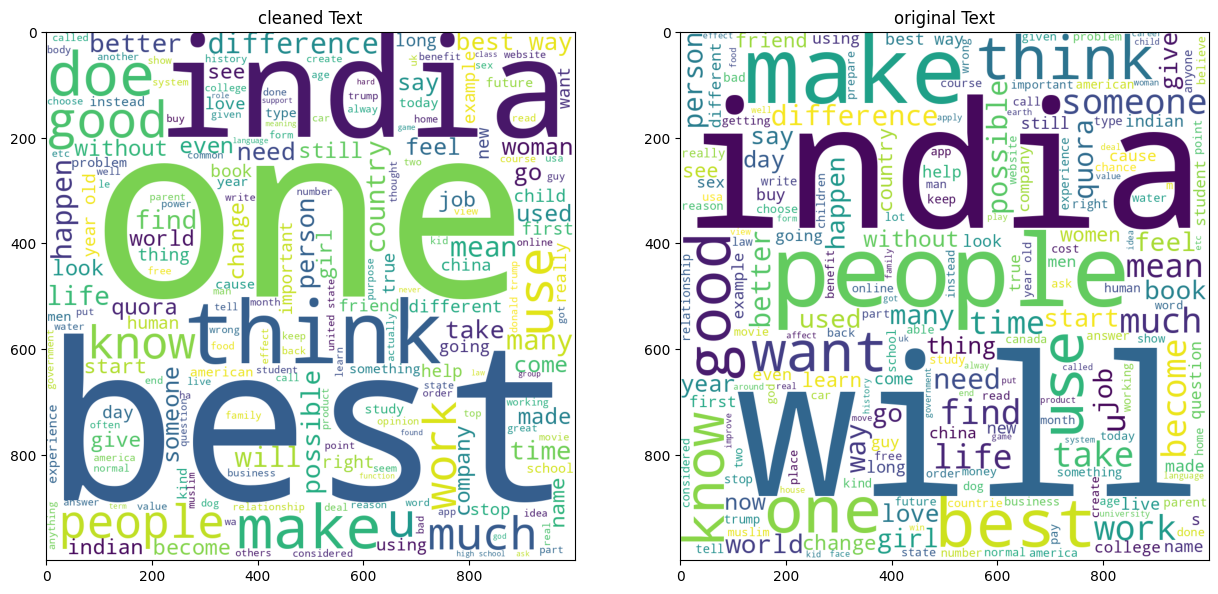

In [ ]:
fig ,axes = plt.subplots(1,2,figsize=(15,10))

texts = ' '.join(df['clean_text'])
wordcloud_stp_removed = WordCloud(width = 1000, height = 1000, background_color ='white', min_font_size = 10).generate(texts)
axes[0].imshow(wordcloud_stp_removed)
axes[0].set_title('cleaned Text')

texts_stp = ' '.join(text.lower() for text in df['question_text'])
wordcloud_stp = WordCloud(width = 1000, height = 1000, background_color ='white', min_font_size = 10).generate(texts_stp)
axes[1].imshow(wordcloud_stp)
axes[1].set_title('original Text')

Text(0.5, 1.0, 'InSincere question wordcloud')

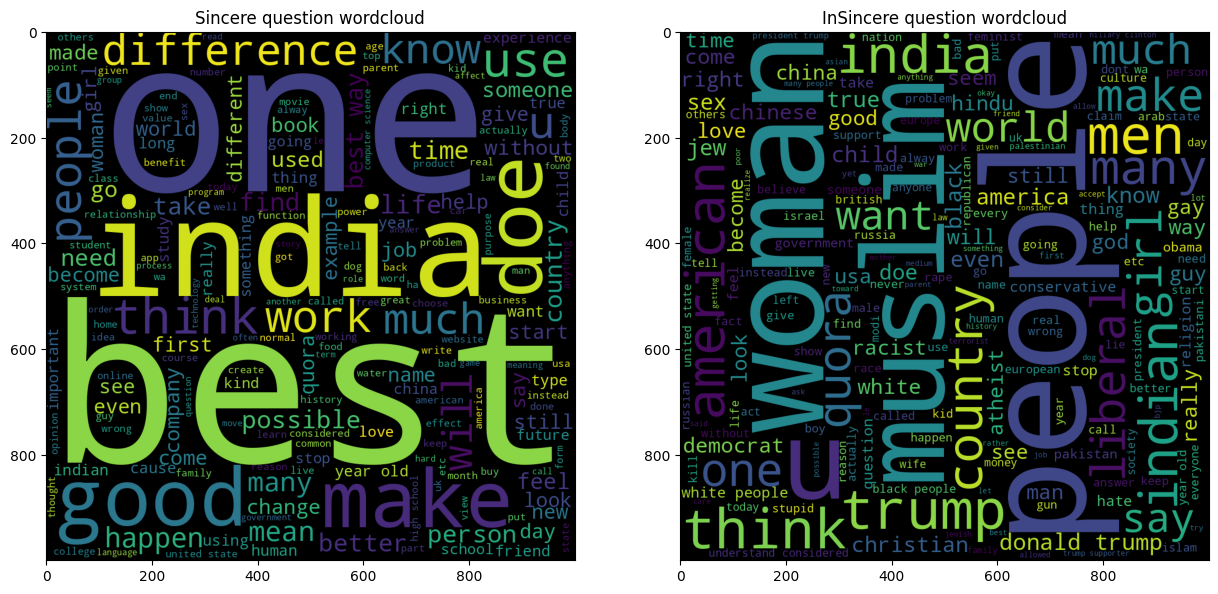

In [ ]:
fig ,axes = plt.subplots(1,2,figsize=(15,10))

texts_sin = ' '.join(df[df['target']==0]['clean_text'])
wordcloud_sin = WordCloud(width = 1000, height = 1000,background_color ='black', min_font_size = 8).generate(texts_sin)
axes[0].imshow(wordcloud_sin)
axes[0].set_title('Sincere question wordcloud')

texts_ins = ' '.join(df[df['target']==1]['clean_text'])
wordcloud_ins = WordCloud(width = 1000, height = 1000,background_color ='black', min_font_size = 8).generate(texts_ins)
axes[1].imshow(wordcloud_ins)
axes[1].set_title('InSincere question wordcloud')

In [ ]:
#Sincere question most common tokens are best, india
#insincere questions contains words like trump, muslims, woman

###Modelling

**TFIDF**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_test.csv')
df.head()

,question_text,target,token_cnt,char_len,n_unique_tokens,n_special_char,n_digit,stp_removed,clean_text
0,How did Quebec nationalists see their province...,0,13,72,13,1,4,NaN,how quebec nationalist see province nation 1960s
1,"Do you have an adopted dog, how would you enco...",0,16,81,15,2,0,NaN,do adopted dog would encourage people adopt shop
2,Why does velocity affect time? Does velocity a...,0,10,67,8,2,0,NaN,why velocity affect time doe velocity affect s...
3,How did Otto von Guericke used the Magdeburg h...,0,9,57,9,1,0,NaN,how otto von guericke used magdeburg hemisphere
4,Can I convert montra helicon D to a mountain b...,0,15,77,15,1,0,NaN,can i convert montra helicon d mountain bike c...


In [ ]:
mask = df.isnull().any(axis=1)

# select the rows with NaN values using the boolean mask
result = df[mask]
result

,question_text,target,token_cnt,char_len,n_unique_tokens,n_special_char,n_digit,stp_removed,clean_text
0,How did Quebec nationalists see their province...,0,13,72,13,1,4,NaN,how quebec nationalist see province nation 1960s
1,"Do you have an adopted dog, how would you enco...",0,16,81,15,2,0,NaN,do adopted dog would encourage people adopt shop
2,Why does velocity affect time? Does velocity a...,0,10,67,8,2,0,NaN,why velocity affect time doe velocity affect s...
3,How did Otto von Guericke used the Magdeburg h...,0,9,57,9,1,0,NaN,how otto von guericke used magdeburg hemisphere
4,Can I convert montra helicon D to a mountain b...,0,15,77,15,1,0,NaN,can i convert montra helicon d mountain bike c...
...,...,...,...,...,...,...,...,...,...
1306117,What other technical skills do you need as a c...,0,17,93,16,3,0,NaN,what technical skill need computer science und...
1306118,Does MS in ECE have good job prospects in USA ...,0,19,91,18,1,0,NaN,doe m ece good job prospect usa like india it ...
1306119,Is foam insulation toxic?,0,4,25,4,1,0,NaN,is foam insulation toxic
1306120,How can one start a research project based on ...,0,13,71,13,1,0,NaN,how one start research project based biochemis...


In [ ]:
df = df.drop('stp_removed',axis=1)
df = df.dropna()


In [ ]:
df.head()

,question_text,target,token_cnt,char_len,n_unique_tokens,n_special_char,n_digit,clean_text
0,How did Quebec nationalists see their province...,0,13,72,13,1,4,how quebec nationalist see province nation 1960s
1,"Do you have an adopted dog, how would you enco...",0,16,81,15,2,0,do adopted dog would encourage people adopt shop
2,Why does velocity affect time? Does velocity a...,0,10,67,8,2,0,why velocity affect time doe velocity affect s...
3,How did Otto von Guericke used the Magdeburg h...,0,9,57,9,1,0,how otto von guericke used magdeburg hemisphere
4,Can I convert montra helicon D to a mountain b...,0,15,77,15,1,0,can i convert montra helicon d mountain bike c...


In [ ]:
X = df.drop('target',axis=1)
y = df['target'].values

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify = y,random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,stratify = y_train, test_size=0.1, random_state=22)

print('X_train: ', X_train.shape, y_train.shape)
print('X_test: ',X_test.shape, y_test.shape)
print('X_val: ',X_val.shape, y_val.shape)

X_train:  (822853, 7) (822853,)
X_test:  (91429, 7) (91429,)
X_val:  (391836, 7) (391836,)


In [ ]:
print('y_train:',pd.Series(y_train).value_counts())
print()
print('y_test:',pd.Series(y_test).value_counts())
print()
print('y_val:',pd.Series(y_val).value_counts())

y_train: 0    771944
1     50909
dtype: int64

y_test: 0    85772
1     5657
dtype: int64

y_val: 0    367594
1     24242
dtype: int64


In [ ]:
tfidf = TfidfVectorizer(max_features =100000,stop_words='english',ngram_range=(1,2))   #consider bigrams
tf_fit = tfidf.fit(df['clean_text'])                  #fit tf-idf on texts
tf_train = tfidf.transform(X_train['clean_text'].values)    #transofrm token into wieghts
tf_val = tfidf.transform(X_val['clean_text'].values)
tf_test = tfidf.transform(X_test['clean_text'].values)

In [ ]:
print(tf_train.shape)
print(tf_val.shape)
print(tf_test.shape)

(822853, 100000)
(391836, 100000)
(91429, 100000)


In [ ]:
#since we are using Logistic regression, scaling data play imp role


sc = StandardScaler()
x_train_tc = sc.fit_transform(X_train['token_cnt'].values.reshape(-1, 1))
x_val_tc = sc.fit_transform(X_val['token_cnt'].values.reshape(-1, 1))
x_test_tc = sc.fit_transform(X_test['token_cnt'].values.reshape(-1, 1))

sc_char = StandardScaler()
x_train_ch = sc_char.fit_transform(X_train['char_len'].values.reshape(-1, 1))
x_val_ch = sc_char.fit_transform(X_val['char_len'].values.reshape(-1, 1))
x_test_ch = sc_char.fit_transform(X_test['char_len'].values.reshape(-1, 1))

sc_unique = StandardScaler()
x_train_uq = sc_unique.fit_transform(X_train['n_unique_tokens'].values.reshape(-1, 1))
x_val_uq= sc_unique.fit_transform(X_val['n_unique_tokens'].values.reshape(-1, 1))
x_test_uq = sc_unique.fit_transform(X_test['n_unique_tokens'].values.reshape(-1, 1))

sc_special = StandardScaler()
x_train_sp = sc_special.fit_transform(X_train['n_special_char'].values.reshape(-1, 1))
x_val_sp = sc_special.fit_transform(X_val['n_special_char'].values.reshape(-1, 1))
x_test_sp = sc_special.fit_transform(X_test['n_special_char'].values.reshape(-1, 1))


sc_digit = StandardScaler()
x_train_dg = sc_digit.fit_transform(X_train['n_digit'].values.reshape(-1, 1))
x_val_dg = sc_digit.fit_transform(X_val['n_digit'].values.reshape(-1, 1))
x_test_dg = sc_digit.fit_transform(X_test['n_digit'].values.reshape(-1, 1))

In [ ]:
#stacking tf-idf array and numerical columns
train = hstack((tf_train,x_train_tc,x_train_ch,x_train_uq,x_train_sp,x_train_dg))

test = hstack((tf_test,x_test_tc,x_test_ch,x_test_uq,x_test_sp,x_test_dg))

val = hstack((tf_val,x_val_tc,x_val_ch,x_val_uq,x_val_sp,x_val_dg))

print(train.shape, y_train.shape)
print(val.shape, y_test.shape)
print(test.shape, y_val.shape)

(822853, 100005) (822853,)
(391836, 100005) (91429,)
(91429, 100005) (391836,)


In [ ]:
train

<822853x100005 sparse matrix of type '<class 'numpy.float64'>'
	with 9714340 stored elements in COOrdinate format>

In [ ]:
clf = {
    "lr": LogisticRegression(),
    #'df' : DecisionTreeClassifier  #was taking longer time
}
accuracy=[]
precision=[]
recall=[]
f1=[]
algo=[]

for key, classifier in clf.items():
    algo.append(classifier.__class__.__name__)
    classifier.fit(train, y_train)
    pred=classifier.predict(val)
    precision.append((precision_score(y_val,pred)))
    recall.append((recall_score(y_val,pred)))
    f1.append((f1_score(y_val,pred)))
    accuracy.append((accuracy_score(y_val,pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



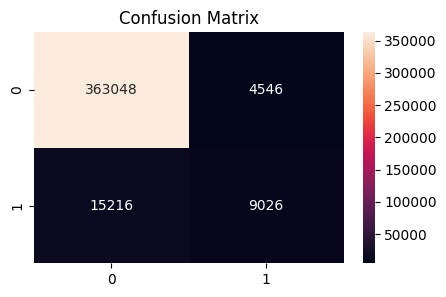

Correctly classified sincere questions: 98.76%
Correctly classified insincere questions: 37.23%


In [ ]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5, 3))
  sns.heatmap(cm, annot=True, fmt='d')
  plt.title('Confusion Matrix')
  plt.show()

  print(f"Correctly classified sincere questions: {round(cm[0][0]/(cm[0][0] + cm[0][1])*100, 2)}%")
  print(f"Correctly classified insincere questions: {round(cm[1][1]/(cm[1][0] + cm[1][1])*100, 2)}%")

plot_confusion_matrix(y_val,pred)

In [ ]:

metrics=pd.DataFrame({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'f1_score':f1},index=algo)
metrics

,Accuracy,Precision,Recall,f1_score
LogisticRegression,0.949566,0.665046,0.372329,0.477389


In [ ]:
# clf = {
#     "lr": LogisticRegression(),
#     'nb':MultinomialNB()
# }
# accuracy=[]
# precision=[]
# recall=[]
# f1=[]
# algo=[]

# for key, classifier in clf.items():
#     algo.append(classifier.__class__.__name__)
#     classifier.fit(tf_train, y_train)
#     pred=classifier.predict(tf_test)
#     precision.append((precision_score(y_test,pred)))
#     recall.append((recall_score(y_test,pred)))
#     f1.append((f1_score(y_test,pred)))
#     accuracy.append((accuracy_score(y_test,pred)))

# metrics=pd.DataFrame({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'f1_score':f1},index=algo)
# metrics

In [ ]:
#Recall and F1_score is toolow.
#reason for higher accuracy is imbalnace of dataset. since 94% of our data is sincere questions, our model is kind of biased towrards that class.
#we can balance this using SMOTE techniques or will try deeplearning techniques.

['LogisticRegression', 'MultinomialNB']

###DeepLearning

In [ ]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [ ]:
# #https://stackoverflow.com/questions/45411902/how-to-use-f1-score-with-keras-model
# #or we could have used sklear metrics to calcualte
# def f1_score(y_true, y_pred):

#     # Count positive samples.
#     c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

#     # If there are no true samples, fix the F1 score at 0.
#     if c3 == 0:
#         return 0

#     # How many selected items are relevant?
#     precision = c1 / c2

#     # How many relevant items are selected?
#     recall = c1 / c3

#     # Calculate f1_score
#     f1_score = 2 * (precision * recall) / (precision + recall)
#     return f1_score


In [ ]:
df_sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Project_NLP/cleaned_test.csv')   #made a preprocessed text into file .
X = df_sample['clean_text']
y = df_sample['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y,random_state=22)


74

In [ ]:
max_length=50
vocab_size=100000
embedding_dim=64
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"



tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)  #tokenize the sentences
tokenizer.fit_on_texts(df_sample['clean_text'])                #fit the tokens
word_index = tokenizer.word_index
x_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding=padding_type, truncating=trunc_type)  #padd the sentences if its less than max_length
x_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding=padding_type, truncating=trunc_type)    #padd the sentences if its less than max_length


In [ ]:
#from tensorflow.keras.layers import CuDNNLSTM

from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional,SpatialDropout1D


model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))  #define embed layer
model.add(SpatialDropout1D(0.2))                                          #add dropout layer
model.add(Bidirectional(LSTM(256)))                                       #bi-LSTM of 256 units
model.add(Dense(32,activation='relu'))                                    #FN of 32 units
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 512)              731136    
 l)                                                              
                                                                 
 dense_23 (Dense)            (None, 32)                16416     
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,747,585
Trainable params: 5,747,585
Non-

In [ ]:
batch_size=128

model.compile(loss = 'binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
history=model.fit(x_train_seq,y_train, epochs=15, batch_size=batch_size,verbose = 1,validation_data=(x_test_seq,y_test))

Epoch 1/15
547/547 [==============================] - 55s 85ms/step - loss: 0.2450 - accuracy: 0.9127 - val_loss: 0.1867 - val_accuracy: 0.9270
Epoch 2/15
547/547 [==============================] - 17s 31ms/step - loss: 0.1576 - accuracy: 0.9387 - val_loss: 0.2121 - val_accuracy: 0.9273
Epoch 3/15
547/547 [==============================] - 15s 27ms/step - loss: 0.1620 - accuracy: 0.9443 - val_loss: 0.3719 - val_accuracy: 0.9272
Epoch 4/15
547/547 [==============================] - 14s 25ms/step - loss: 0.1590 - accuracy: 0.9526 - val_loss: 0.3175 - val_accuracy: 0.9211
Epoch 5/15
547/547 [==============================] - 13s 23ms/step - loss: 0.1806 - accuracy: 0.9483 - val_loss: 0.3016 - val_accuracy: 0.9250
Epoch 6/15
547/547 [==============================] - 12s 23ms/step - loss: 0.1798 - accuracy: 0.9513 - val_loss: 0.3824 - val_accuracy: 0.9199
Epoch 7/15
547/547 [==============================] - 12s 22ms/step - loss: 0.1814 - accuracy: 0.9432 - val_loss: 0.3492 - val_accuracy:

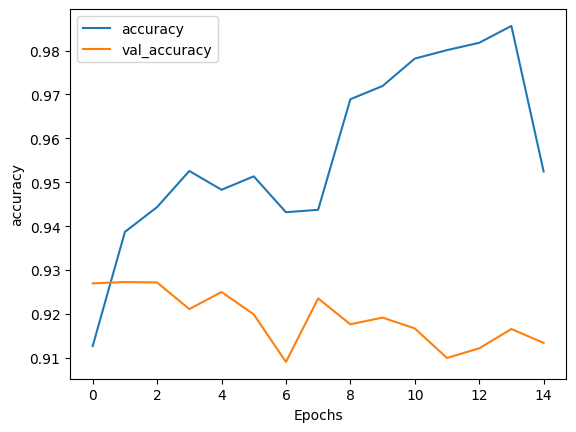

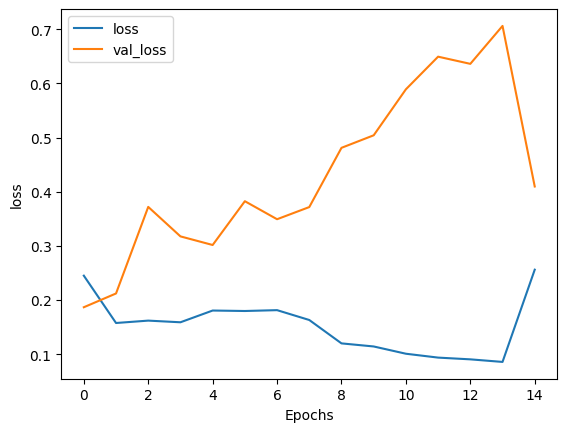

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:

threshold = 0.5
pred_values = model.predict(x_test_seq)
print(classification_report((pred_values>0).astype(int).flatten(),y_test))


938/938 [==============================] - 4s 4ms/step
              precision    recall  f1-score   support

           0       0.75      0.98      0.85     20726
           1       0.83      0.27      0.41      9274

    accuracy                           0.76     30000
   macro avg       0.79      0.62      0.63     30000
weighted avg       0.78      0.76      0.71     30000



###GLOVE EMBEDDING

In [ ]:
df_sample = pd.read_csv('bert_sample.csv')   #this was tried after bert , since bert was not working on big data we had to reduce it to 100,000 data and that data was used with glove embeddings which did not give good results
df_sample = df_sample.sample(frac=1)

X_train, X_test,y_train,y_test = train_test_split(df_sample['clean_text'],df_sample['target'] , test_size=0.3, random_state=22,stratify=df_sample['target'])


,question_text,target,token_cnt,char_len,n_unique_tokens,n_special_char,n_digit,clean_text
11260,Why some software like OPTO Snap can only be u...,0,14,73,14,1,0,why software like opto snap used window pro ed...
18381,"Why was The Handmaid's Tale given a show now, ...",0,12,61,12,3,2,why the handmaid tale given show 32 year
55876,Fue el peronismo beneficioso para La Argentina?,0,7,47,7,1,0,fue el peronismo beneficioso para la argentina
97981,Have you ever been sprayed by a skunk?,0,8,38,8,1,0,have ever sprayed skunk
93595,"After the incident of MH370, can there not be ...",0,27,166,25,2,3,after incident mh370 change done system satell...
...,...,...,...,...,...,...,...,...
38369,There's this guy I like and I already texted f...,0,47,210,37,8,0,guy i like i already texted first three time r...
16844,"What is the relationship between hardness, ten...",0,12,97,12,3,0,what relationship hardness tensile strength co...
25255,What is the hardest part about living with you...,0,10,55,10,1,0,what hardest part living family
6291,How long do nuclear weapons last?,0,6,33,6,1,0,how long nuclear weapon last


In [ ]:
max_length=50
embedding_dim=300
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"



In [ ]:
tokenizer_1 = Tokenizer()
tokenizer_1.fit_on_texts(X_train)
x_train_seq_1 = tokenizer_1.texts_to_sequences(X_train)
x_test_seq_1 = tokenizer_1.texts_to_sequences(X_test)

vocab_length = len(tokenizer_1.word_index) + 1 # Adding 1 for oov token


# Padding all reviews to fixed length 50
maxlen = 50
x_train_seq_1 = pad_sequences(x_train_seq_1, padding='post', maxlen=maxlen)
x_test_seq_1 = pad_sequences(x_test_seq_1, padding='post', maxlen=maxlen)

In [ ]:
from numpy import asarray, zeros

embeddings_index = dict() # Initialize an empty dictionary
embedding_path = '/content/glove.6B.300d.txt'

f = open(embedding_path, encoding='utf8')
i = 1
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 343773 word vectors.


In [ ]:
embedding_matrix = zeros((vocab_length, 300))
count = 0                                               #count for words with zero embeddings
word_0_emb = []
for word, index in tokenizer_1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    #print(embedding_vector)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
    else:
      count+=1
      word_0_emb.append(word)

# Print Embedding Matrix shape
print(embedding_matrix.shape)
print(count)

(42432, 300)
11187


In [ ]:
word_0_emb

['btech',
 'whatsapp',
 'snapchat',
 'quorans',
 'blockchain',
 'heshe',
 'hisher',
 'youve',
 'brexit',
 'ethereum',
 'upvotes',
 'cryptocurrency',
 'shortterm',
 'kvpy',
 'redmi',
 'flipkart',
 'clat',
 'bitsat',
 'cryptocurrencies',
 'upvote',
 'shouldnt',
 'quoras',
 'aadhar',
 'comedk',
 'himher',
 'articleship',
 'ibps',
 'fiitjee',
 'ntse',
 '201718',
 'cooky',
 'youtuber',
 'nonmuslims',
 'wbjee',
 'intp',
 'exgirlfriend',
 'infj',
 'iiser',
 'magento',
 'everyones',
 'coinbase',
 'pendrive',
 'iocl',
 'whatis',
 'jongun',
 'tamilians',
 'blowjob',
 'coep',
 'quoran',
 'mhtcet',
 'shithole',
 'zebpay',
 'sjws',
 'bnbr',
 'muoet',
 'fortnite',
 'devops',
 'nmims',
 'rvce',
 'vjti',
 'oneplus',
 'plz',
 'iitb',
 'emoji',
 'mhcet',
 'antifa',
 'shopify',
 'b1b2',
 'paytm',
 'vape',
 'nodejs',
 'chsl',
 'angularjs',
 'duckduckgo',
 'altright',
 'skyrim',
 'africanamericans',
 'backlinks',
 'iiest',
 'snapdeal',
 'aspergers',
 'werent',
 'uceed',
 'laravel',
 'wechat',
 'antinationa

In [ ]:
#from tensorflow.keras.layers import CuDNNLSTM

model_glv = Sequential()
model_glv.add(Embedding(vocab_length, 300, weights=[embedding_matrix],input_length=max_length))
model_glv.add(SpatialDropout1D(0.2))
model_glv.add(Bidirectional(LSTM(64,dropout=0.2)))
model_glv.add(Dense(32,activation='relu'))
model_glv.add(Dense(32,activation='relu'))
model_glv.add(Dropout(0.1))
model_glv.add(Dense(1,activation='sigmoid'))

print(model_glv.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 300)           12729600  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 50, 300)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)               

In [ ]:
e_stp = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
m_ckpt = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

batch_size=64
model_glv.compile(loss = 'binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
history_glv=model_glv.fit(x_train_seq_1,y_train, epochs=8, batch_size=batch_size,verbose = 1,validation_data=(x_test_seq_1,y_test))

Epoch 1/8
1094/1094 [==============================] - 572s 517ms/step - loss: 0.1928 - accuracy: 0.9234 - val_loss: 0.1634 - val_accuracy: 0.9328
Epoch 2/8
1094/1094 [==============================] - 568s 519ms/step - loss: 0.1454 - accuracy: 0.9415 - val_loss: 0.1608 - val_accuracy: 0.9347
Epoch 3/8
1094/1094 [==============================] - 558s 510ms/step - loss: 0.1123 - accuracy: 0.9553 - val_loss: 0.1784 - val_accuracy: 0.9332
Epoch 4/8
1094/1094 [==============================] - 569s 520ms/step - loss: 0.0850 - accuracy: 0.9666 - val_loss: 0.2109 - val_accuracy: 0.9287
Epoch 5/8
 718/1094 [==================>...........] - ETA: 3:01 - loss: 0.0619 - accuracy: 0.9763

KeyboardInterrupt: ignored

In [ ]:
threshold = 0.5
pred_values = model_glv.predict(x_test_seq_1)
print(classification_report((pred_values>0).astype(int).flatten(),y_test))


214/214 [==============================] - 21s 82ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.10      0.18      6831

    accuracy                           0.10      6831
   macro avg       0.50      0.05      0.09      6831
weighted avg       1.00      0.10      0.18      6831



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



#BERT

In [ ]:
! pip install transformers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer, TFBertModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.0 MB/s eta 0:00:00


In [ ]:
df[df['target']==0].shape

(1225310, 8)

In [ ]:
df[df['target']==1].shape

(80808, 8)

In [ ]:
#reason for reducing dataset is because colab and kaggle coudnt compute for 1.3M rows adn Bert is heavy model due to which our
#model kept crashing.

target0_subset = df[df['target']==0].sample(n=90000, random_state=22)
target1_subset = df[df['target']==1].sample(n=10000, random_state=22)
df_sample = pd.concat([target0_subset, target1_subset], ignore_index=True)
df_sample = df_sample.sample(frac=1, random_state=22)

df_sample.shape

(100000, 8)

In [ ]:

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')  #load the tokenizer
bert = TFBertModel.from_pretrained('bert-base-cased')         #load the weights

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
df_sample.to_csv('bert_sample.csv',index=False)

In [ ]:
df_sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Project_NLP/bert_sample.csv')
df_sample.head()

,question_text,target,token_cnt,char_len,n_unique_tokens,n_special_char,n_digit,clean_text
0,What can happen if a female with 90% heart blo...,0,16,73,15,2,2,what happen female 90 heart block go long bus ...
1,What challenges have Leoncio P. Deriada faced ...,0,10,58,10,2,0,what challenge leoncio p deriada faced writer
2,What are the characteristics of thre earth dif...,0,11,71,11,1,0,what characteristic thre earth different planet
3,Does Elon Musk's tunneling plan mean he has gi...,0,13,70,13,2,0,doe elon musk tunneling plan mean given hyperloop
4,"What causes the ""RegSvr32 module failed to loa...",0,13,76,13,3,2,what cause regsvr32 module failed load error w...


In [ ]:
df_sample['target'].value_counts()

0    90000
1    10000
Name: target, dtype: int64

In [ ]:
#split the data
X_train, X_test,y_train,y_test = train_test_split(df_sample['clean_text'],df_sample['target'] , test_size=0.3, random_state=22,stratify=df_sample['target'])


In [ ]:
max_len = 50            #max length to consider

#add the specila characters [cls] and [SEP]
#truncate if text is longer than max_len ie 50 tokens
#padd if text is small with 0's
#reutrn input_id and attention_mask

X_tr = tokenizer(text=X_train.tolist(), add_special_tokens=True,
                 max_length=max_len, truncation=True,
                  padding='max_length', return_tensors='tf',
                  return_token_type_ids=False, return_attention_mask=True)

X_te = tokenizer(text=X_test.tolist(), add_special_tokens=True,
                 max_length=max_len, truncation=True,
                   padding='max_length', return_tensors='tf',
                 return_token_type_ids=False, return_attention_mask=True)


In [ ]:
X_tr      #shape=(70000, 50)

{'input_ids': <tf.Tensor: shape=(70000, 50), dtype=int32, numpy=
array([[  101,  1110,  1936, ...,     0,     0,     0],
       [  101,  1184,  1948, ...,     0,     0,     0],
       [  101,  1725, 15865, ...,     0,     0,     0],
       ...,
       [  101,  1150,  1207, ...,     0,     0,     0],
       [  101,  1184,  3719, ...,     0,     0,     0],
       [  101,  1110,  6782, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(70000, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
X_te      #shape=(30000, 50)

{'input_ids': <tf.Tensor: shape=(30000, 50), dtype=int32, numpy=
array([[ 101, 1293, 1510, ...,    0,    0,    0],
       [ 101,  178, 1185, ...,    0,    0,    0],
       [ 101, 1184, 3641, ...,    0,    0,    0],
       ...,
       [ 101, 1293, 1831, ...,    0,    0,    0],
       [ 101, 1184, 1341, ...,    0,    0,    0],
       [ 101, 1293,  178, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(30000, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids") #create a layer of len 50 tokens
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

In [ ]:
embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)         #captures importance features
out = Dense(128, activation='relu')(out)                    #FNN with 128 units and dropout of 0.1
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)                     #FNN with 128 units

y = Dense(2, activation='softmax')(out)                     #results in two output

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)   #input_id and input_mask is passed as inputs
model.layers[2].trainable = True                                    #update weights of BertLayer

optimizer = Adam(learning_rate=5e-05, epsilon=1e-08, clipnorm=1.0 )

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

In [ ]:
#epoch 5 and bacth_size=64
history_bert = model.fit(x = {'input_ids':X_tr['input_ids'], 'attention_mask':X_tr['attention_mask']},y = to_categorical(y_train),
                          validation_data = ({'input_ids':X_te['input_ids'], 'attention_mask':X_te['attention_mask']},to_categorical(y_test)),
                          epochs=5,batch_size=64)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning:

"`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



1094/1094 [==============================] - 949s 813ms/step - loss: 0.1760 - balanced_accuracy: 0.9287 - val_loss: 0.1547 - val_balanced_accuracy: 0.9365
Epoch 2/5
1094/1094 [==============================] - 871s 796ms/step - loss: 0.1270 - balanced_accuracy: 0.9497 - val_loss: 0.1632 - val_balanced_accuracy: 0.9360
Epoch 3/5
1094/1094 [==============================] - 870s 795ms/step - loss: 0.0874 - balanced_accuracy: 0.9671 - val_loss: 0.1874 - val_balanced_accuracy: 0.9347
Epoch 4/5
1094/1094 [==============================] - 870s 795ms/step - loss: 0.0526 - balanced_accuracy: 0.9814 - val_loss: 0.2482 - val_balanced_accuracy: 0.9357
Epoch 5/5
1094/1094 [==============================] - 831s 760ms/step - loss: 0.0335 - balanced_accuracy: 0.9886 - val_loss: 0.2175 - val_balanced_accuracy: 0.9308


In [ ]:
from sklearn.metrics import classification_report

pred_values = model.predict({'input_ids': X_te['input_ids'], 'attention_mask': X_te['attention_mask']})
y_pred = np.argmax(pred_values, axis=1)
print(classification_report(y_test, y_pred))

938/938 [==============================] - 129s 130ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     27000
           1       0.65      0.68      0.66      3000

    accuracy                           0.93     30000
   macro avg       0.81      0.82      0.81     30000
weighted avg       0.93      0.93      0.93     30000



###END